In [93]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [94]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

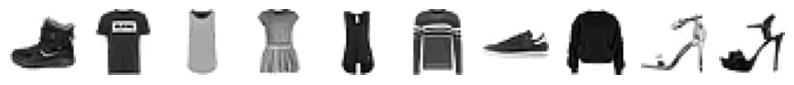

In [95]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r') # gray_r: 현재색반전  0  255
    axs[i].axis('off')                          # 그래프의 눈금을 제거
plt.show() 

In [96]:
train_input

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [97]:
train_input.shape

(60000, 28, 28)

In [98]:
train_scaled =train_input/255.0
# trian_scaled = trian_scaled.reshape(-1,28*28) #flatten 사이즈 그대로 적용(28,28)

In [99]:
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [100]:
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델 설정 옵티마이저 -adam
# model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가 model.evaluate(val_scaled,val_target)



In [101]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #train_input.shape 사이즈이다
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [102]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

epochs=20 훈련세트 정확도가 높아짐
검증세트를 가지고 정확도를 측정

In [103]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마다 loss,accuracy 값을 저장
history = model.fit(train_scaled,train_target,batch_size=32,epochs=20)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7728 - loss: 0.6692
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8584 - loss: 0.3970
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8684 - loss: 0.3603
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8781 - loss: 0.3312
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8874 - loss: 0.3014
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8954 - loss: 0.2901
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8996 - loss: 0.2731
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9018 - loss: 0.2662
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9056 - loss: 0.2550
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9089 - loss: 0.2447
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9091 - loss: 0.2452
Epoch 12/20
1500/1500 ━━━━━━━━

In [104]:
# hisotry keys index를 확인
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [105]:
history.history['loss']

[0.5274966955184937,
 0.3926179111003876,
 0.35239851474761963,
 0.3288758397102356,
 0.30820101499557495,
 0.29378774762153625,
 0.2816586196422577,
 0.2700691819190979,
 0.2599289119243622,
 0.2499982714653015,
 0.24283312261104584,
 0.23551256954669952,
 0.22690270841121674,
 0.2224406898021698,
 0.2150791585445404,
 0.20841485261917114,
 0.20422053337097168,
 0.19752874970436096,
 0.19406989216804504,
 0.1882210075855255]

train 세트 검증데이터 (loss,accuarcy) 그래프 - history

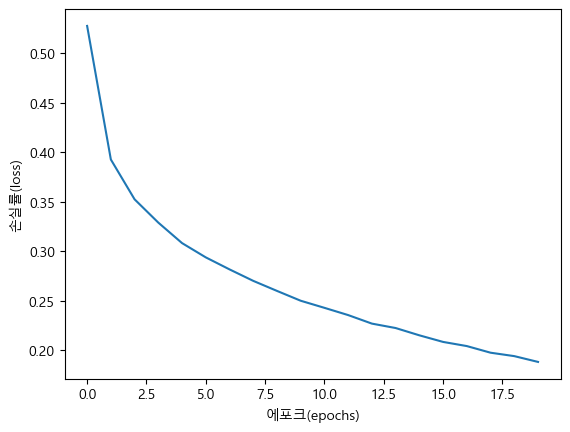

In [106]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
# plt.savefig('m0529_03',dpi=300)
plt.show()

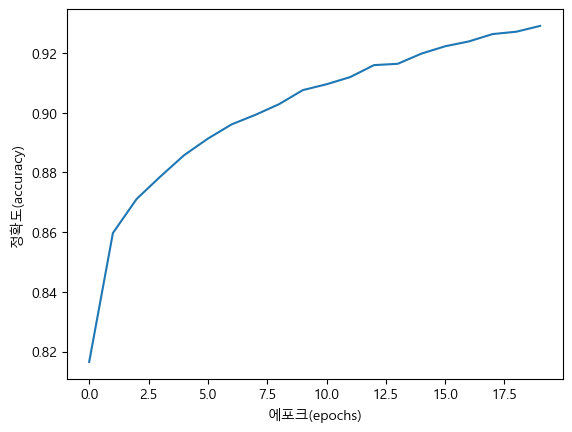

In [107]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
# plt.savefig('m0529_03',dpi=300)
plt.show()

검증세트도 함께 검증

In [108]:
# model.fit -loss,accurcy정보를 리턴 (history)
# 검증 세트(test,val)도 함께 검증 - history 정보로 받을수있음

In [109]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마다 loss,accuracy 값을 저장.
# train_scaled,val_scaled 함께 훈련시킴.
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9335 - loss: 0.1783 - val_accuracy: 0.8845 - val_loss: 0.3494
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9340 - loss: 0.1755 - val_accuracy: 0.8823 - val_loss: 0.3529
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9352 - loss: 0.1745 - val_accuracy: 0.8838 - val_loss: 0.3672
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9372 - loss: 0.1666 - val_accuracy: 0.8824 - val_loss: 0.3656
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9387 - loss: 0.1634 - val_accuracy: 0.8864 - val_loss: 0.3655
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9413 - loss: 0.1584 - val_accuracy: 0.8917 - val_loss: 0.3579
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9418 - loss: 0.1535 - val_accuracy: 0.8836 - val_loss: 0.3821
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9411 - loss: 0.1544 - 

In [110]:
model.evaluate(val_scaled,val_target)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.8869 - loss: 0.4434


[0.4420289993286133, 0.887416660785675]

In [111]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

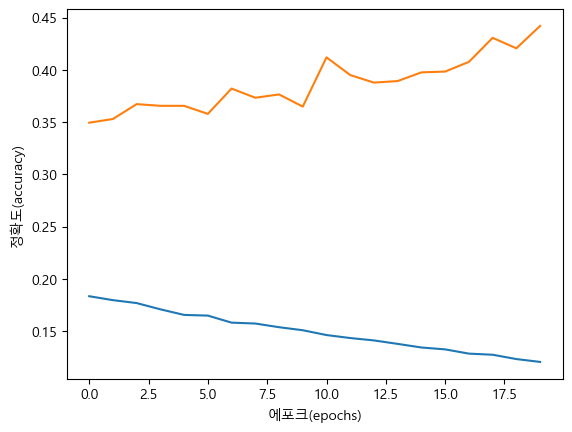

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
# plt.savefig('m0529_03',dpi=300)
plt.show()


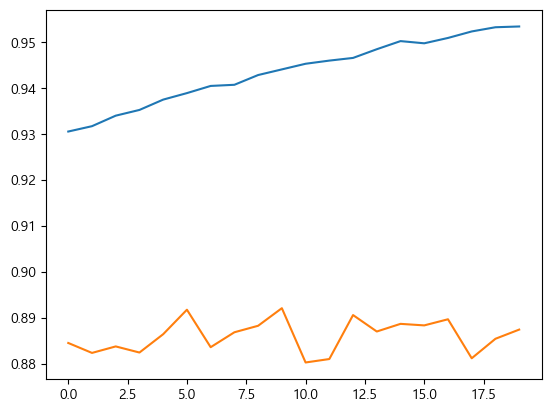

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])




규제